In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDRegressor
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv("/Users/mohd/Desktop/data/train.csv")
test_data = pd.read_csv("/Users/mohd/Desktop/data/test.csv")

fil_train_data = pd.read_csv("/Users/mohd/Desktop/data/filtered_train.csv").fillna(0)
fil_test_data = pd.read_csv("/Users/mohd/Desktop/data/filtered_test.csv").fillna(0)


In [3]:
train_data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


## Functions

In [4]:
def calculateAllPercentages(df):
    tot = {}
    cols = list(df.columns)
    cols.remove('MachineIdentifier')
    cols.remove('HasDetections')
    for col in cols:
        before = df[col].count()
        after = df[col][df["HasDetections"] == 1].count()
        tot[col] = after/before
    
    return tot

## Plotting

In [5]:
tot = calculateAllPercentages(train_data)

In [6]:
index = 0
index_to_col = {}
cols = list(train_data.columns)
cols.remove('MachineIdentifier')
cols.remove('HasDetections')

x = []
y = []
for i in cols:
    index_to_col[index] = i
    x.append(index)
    y.append(tot[i])
    index += 1

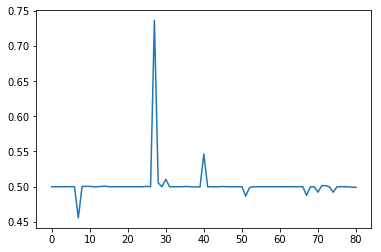

In [7]:
plt.plot(x, y)

## Get numrical training and test data (features)

In [8]:
cols_num = []
cols_others = []
dtypes = train_data.dtypes
for i in range(len(dtypes)):
    if dtypes[i] in ['int64', 'float64']:
        cols_num.append(dtypes.index[i])
    else:
        cols_others.append(dtypes.index[i])

train_nums = train_data[cols_num].fillna(0)
cols_others.remove('MachineIdentifier')
train_others = train_data[cols_others]
test_others = test_data[cols_others]


In [9]:
cols_num.remove('HasDetections')
test_nums = test_data[cols_num].fillna(0)

In [10]:
features = train_nums[cols_num]
results = train_nums['HasDetections']

In [11]:
train_nums.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,7.0,0,0.0,53447.0,1.0,1.0,1,29,128035.0,...,36144.0,0,0.0,0.0,0,0,0.0,0.0,10.0,0
1,0,7.0,0,0.0,53447.0,1.0,1.0,1,93,1482.0,...,57858.0,0,0.0,0.0,0,0,0.0,0.0,8.0,0
2,0,7.0,0,0.0,53447.0,1.0,1.0,1,86,153579.0,...,52682.0,0,0.0,0.0,0,0,0.0,0.0,3.0,0
3,0,7.0,0,0.0,53447.0,1.0,1.0,1,88,20710.0,...,20050.0,0,0.0,0.0,0,0,0.0,0.0,3.0,1
4,0,7.0,0,0.0,53447.0,1.0,1.0,1,18,37376.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


## Loading data

In [12]:
n = len(features)
x_train_tmp = features[:n]
y_train = results[:n]

x_test_tmp = test_nums[:n]

In [13]:
x_train = pd.concat([x_train_tmp, fil_train_data], axis=1)
x_test = pd.concat([x_test_tmp, fil_test_data], axis=1)

## Analyze non-number features

In [14]:
train_others.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,SkuEdition,...,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,10.0.17134.165,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,Retail
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,10.0.17134.1,amd64,rs4_release,Professional,PROFESSIONAL,IBSClean,UNKNOWN,OFFLINE,Retail,NOT_SET
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,...,10.0.17134.165,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,...,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,...,10.0.17134.191,amd64,rs4_release,Core,CORE,Update,FullAuto,IS_GENUINE,Retail,Retail


In [15]:
# t = {}
# for col in cols_others:
#     unique_vals = list(train_others[col].value_counts().index)
#     t[col] = {}
#     index = 0
#     for val in unique_vals:
#         t[col][val] = index
#         index += 1


In [16]:
# s = t['ProductName']

In [17]:
# train_others.replace(t)

In [18]:
# train_others.head()

## Logistic regression (scaling data)

In [ ]:
x_train1 = sklearn.preprocessing.scale(x_train)
x_test1 = sklearn.preprocessing.scale(x_test)

In [ ]:
print(x_train1.shape)
print(y_train.shape)

In [ ]:
log_reg1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class="multinomial").fit(x_train1, y_train)


In [ ]:
predict1 = log_reg1.predict(x_test1)


In [ ]:
d1 = {'MachineIdentifier': test_data['MachineIdentifier'][:n], 'HasDetections': predict1}
output1 = pd.DataFrame(data=d1)


In [ ]:
output1.to_csv("output1.csv", index=False)

In [ ]:
predict11 = log_reg1.predict(x_train1)

print("Score: {:.3f}".format(sum(predict11 == y_train)/n))

## Logistic regression (normalizing data)

In [ ]:
x_train2 = sklearn.preprocessing.scale(x_train)
x_test2 = sklearn.preprocessing.scale(x_test)

In [ ]:
log_reg2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class="multinomial").fit(x_train2, y_train)


In [ ]:
predict2 = log_reg2.predict(x_test2)


In [ ]:
d2 = {'MachineIdentifier': test_data['MachineIdentifier'][:n], 'HasDetections': predict2}
output2 = pd.DataFrame(data=d2)


In [ ]:
output2.to_csv("output2.csv", index=False)

In [ ]:
predict22 = log_reg2.predict(x_train2)

print("Score: {:.3f}".format(sum(predict22 == y_train)/n))

## Logistic regression (data not changed)

In [ ]:
log_reg3 = LogisticRegression(random_state=0, solver='lbfgs', multi_class="multinomial").fit(x_train, y_train)


In [ ]:
predict3 = log_reg3.predict(x_test)


In [ ]:
d3 = {'MachineIdentifier': test_data['MachineIdentifier'][:n], 'HasDetections': predict3}
output3 = pd.DataFrame(data=d3)


In [ ]:
output3.to_csv("output3.csv", index=False)

In [ ]:
predict33 = log_reg3.predict(x_train)

print("Score: {:.3f}".format(sum(predict33 == y_train)/n))

## SGD

In [ ]:
sgd1 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5).fit(x_train, y_train)


In [ ]:
predict4 = sgd1.predict(x_test)

In [ ]:
d4 = {'MachineIdentifier': test_data['MachineIdentifier'][:n], 'HasDetections': predict4}
output4 = pd.DataFrame(data=d4)


In [ ]:
output4.to_csv("output4.csv", index=False)

In [ ]:
predict44 = sgd1.predict(x_train)
print("Score: {:.3f}".format(sum(predict44 == y_train)/n))


## SGD + LR

In [ ]:
sgd2 = SGDRegressor().fit(x_train, y_train)

In [ ]:
predict5 = sgd2.predict(x_test)

In [ ]:
d5 = {'MachineIdentifier': test_data['MachineIdentifier'][:n], 'HasDetections': predict5}
output5 = pd.DataFrame(data=d5)


In [ ]:
output5.to_csv("output5.csv", index=False)

In [ ]:
predict55 = sgd2.predict(x_train)
print("Score: {:.3f}".format(sum(predict55 == y_train)/n))

In [ ]:
np.round(predict55)